In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#N_list = [2** (2 + i) for i in range(1,13)]
N_list = [100, 200, 350, 500, 1000, 2000, 4000, 5000, 10000, 20000, 40000, 60000]
print(N_list)
epoch_list = [30000]
seed_list = np.arange(1234, 1242)
epochs = epoch_list[0]


df = pd.DataFrame(columns = ['train', 'test', 'metrics', 'times'])
df_summary = pd.DataFrame(columns = ['err', 'texec'])
precision_list = []

Dim = 10 * np.pi / 2
for N in N_list:
    precision_list.append(np.sqrt(N) / np.sqrt(Dim))
    for seed in seed_list:
        name = 'results/' + 'seed' + str(seed) + '_N'+ str(N) + '_epochs' + str(epochs) + '_size1'
        my_dict = np.load(name + '.npy', allow_pickle = True)

        texec = my_dict.item().get('texec')
        err = my_dict.item().get('err')
        train = my_dict.item().get('train')
        test = my_dict.item().get('test')
        metrics = my_dict.item().get('metrics')
        metrics_u, metrics_v, metrics_h = metrics.T
        metrics = metrics_u + metrics_v + metrics_h
        times = my_dict.item().get('times')
        pointsec = my_dict.item().get('pointsec')
        
        min_index = test.argmin()
        
        diff = np.abs(train - test) / np.abs(test)

        n = times.shape[0]
        train_min = train[min_index]
        test_min = test[min_index]
        diff_min = np.abs(train_min - test_min) 

        df1 = pd.DataFrame({
                'N': n * [N],
                'seed': n * [seed],
                'train': train,
                'test': test,
                'metrics': metrics,
                'metrics_u': metrics_u,
                'metrics_v': metrics_v,
                'metrics_h': metrics_h,
                'times': times,
                'iteration' : np.arange(n) * 500,
                'pointsec': pointsec
            })
        
        df2 = pd.DataFrame({
            'N': [N],
            'seed': [seed],
            'err': [err],
            'texec': [texec],
            'train': [train[min_index]],
            'test': [test[min_index]],            
            'diff_min': [diff_min]
        })
        
        df = pd.concat([df, df1])
        df_summary = pd.concat([df2, df_summary])
        

df = df.reset_index(drop=True)
df_summary = df_summary.reset_index(drop=True)
    
df['N'] = df['N'].astype(int).astype("category")
df['seed'] = df['seed'].astype("category")
df_summary['N'] = df_summary['N'].astype(int).astype("category")
df_summary['seed'] = df_summary['seed'].astype("category")

[100, 200, 350, 500, 1000, 2000, 4000, 5000, 10000, 20000, 40000, 60000]


In [3]:
rgb = [(236, 0, 84), (254, 64, 18), (38, 174, 65), (44, 95, 177)]
rgb = [(e[0] / 255.0, e[1] / 255.0, e[2] / 255.0) for e in rgb]
cmap = sns.blend_palette(rgb, n_colors=4)

pink = rgb[0]
orange = rgb[1]
green = rgb[2]
blue = rgb[3]

orange = np.array([254, 64, 18]) / 255
green = np.array([38, 174, 65]) / 255
blue = np.array([44, 95, 177]) / 255
purple = np.array([11,54,156]) / 255

my_palette_train = sns.palettes.color_palette([purple, orange])


In [4]:
colors = [pink, pink, pink,
          blue, blue, blue,
         green,green, green, green, green, green, green, green, green, green, green, green]
my_palette = sns.color_palette(colors, n_colors=17)
my_palette


[(0.9254901960784314, 0.0, 0.32941176470588235),
 (0.9254901960784314, 0.0, 0.32941176470588235),
 (0.9254901960784314, 0.0, 0.32941176470588235),
 (0.17254901960784313, 0.37254901960784315, 0.6941176470588235),
 (0.17254901960784313, 0.37254901960784315, 0.6941176470588235),
 (0.17254901960784313, 0.37254901960784315, 0.6941176470588235),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137)]

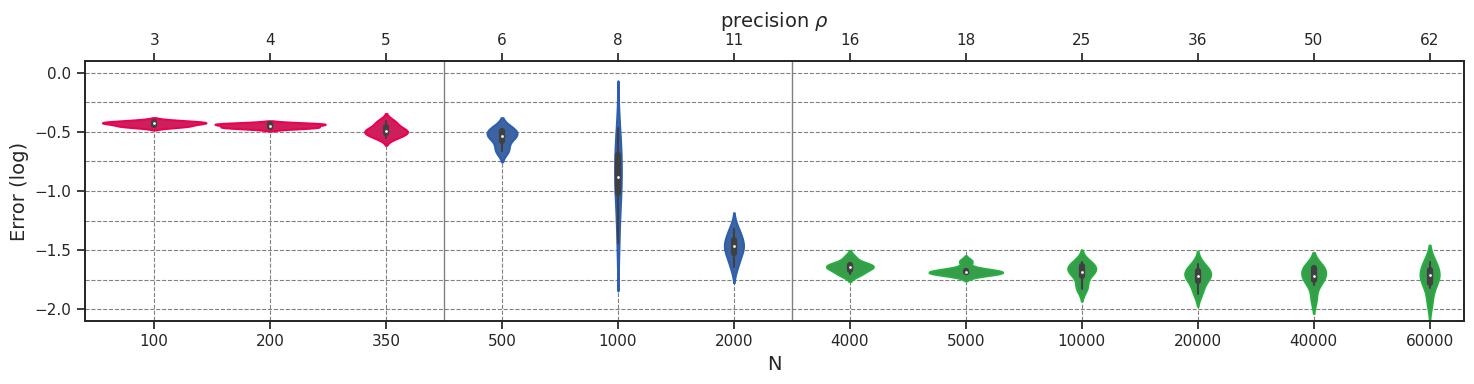

In [5]:
#sns.set_style("whitegrid")
df_summary['err_u'] = df_summary['err'].map(lambda x: x[0])
df_summary['err_v'] = df_summary['err'].map(lambda x: x[1])
df_summary['err_h'] = df_summary['err'].map(lambda x: x[2])


df_summary['err_log'] = np.log10(df_summary['err_u'] + df_summary['err_v'] + df_summary['err_h'])

df_summary['err_log_h'] = np.log10(df_summary['err_h'])
sns.set(style="ticks")

f, ax = plt.subplots(1,1, figsize=(15,4))
ax.set_axisbelow(True)
# oko con width!
g = sns.violinplot(data=df_summary, x = 'N', y = 'err_log_h', palette=my_palette, ax=ax, width=-.95)


ax.set_xlabel(r'N', fontsize=14)
ax.set_ylabel(r'Error (log)', fontsize=14)

ax.axhline(0, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-0.25, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-.5, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-0.75, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-1, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-1.25, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-1.5, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-1.75, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-2, linestyle='--', color='grey',lw=0.8, zorder=-1)

ax.axvline(2.5, linestyle='-', color='grey',lw=1, zorder=-1)
ax.axvline(5.5, linestyle='-', color='grey',lw=1, zorder=-1)

# vertical plots
plt.plot([0,0], [-3,-.4],color='grey',linestyle='--', lw=0.8,zorder=-1)
plt.plot([1,1], [-3,-.4],color='grey',linestyle='--', lw=0.8,zorder=-1)
plt.plot([2,2], [-3,-.4],color='grey',linestyle='--', lw=0.8,zorder=-1)
plt.plot([3,3], [-3,-.4],color='grey',linestyle='--', lw=0.8,zorder=-1)
plt.plot([4,4], [-3,-1.5],color='grey',linestyle='--', lw=0.8,zorder=-1)

for i in range(5, 11):
    plt.plot([i,i], [-3,-1.5],color='grey',linestyle='--', lw=0.8,zorder=-1)
    
plt.ylim(-2.1,0.1)
plt.xlim(-.6,11.3)


ax2 = ax.twiny()

new_tick_locations = np.arange(np.array(N_list).shape[0])
precision_list = np.array(precision_list)

def tick_function(X):
    return ["%0.f" % z for z in X]

ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(precision_list))
ax2.set_xlabel(r"precision $\rho$", fontsize=14)

for i in range(12):
    g.collections[2 * i].set_edgecolor(my_palette[i])

    
#plt.subplots_adjust(bottom=0.1)
plt.tight_layout()


plt.savefig('plots/transientSchrodinger.pdf')

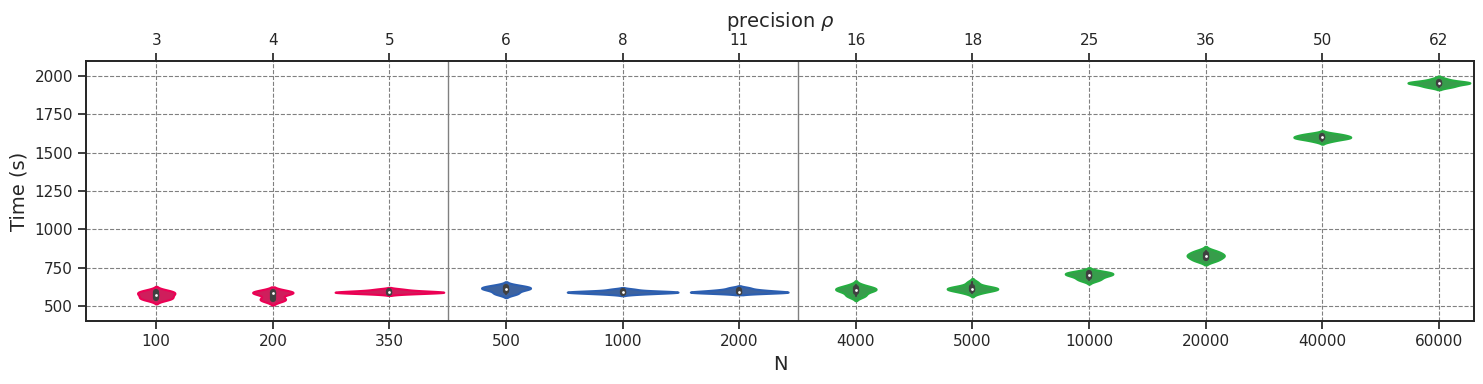

In [6]:
sns.set(style="ticks")

f, ax = plt.subplots(1,1, figsize=(15,4))
ax.set_axisbelow(True)
# oko con width!
g = sns.violinplot(data=df_summary, x = 'N', y = 'texec', palette=my_palette, ax=ax, width=-.95)


ax.set_xlabel(r'N', fontsize=14)
ax.set_ylabel(r'Time (s)', fontsize=14)

plt.grid(color='grey',linestyle='--', lw=0.8,zorder=-1)

ax.axvline(2.5, linestyle='-', color='grey',lw=1, zorder=-1)
ax.axvline(5.5, linestyle='-', color='grey',lw=1, zorder=-1)

plt.ylim(400,2100)
plt.xlim(-.6,11.3)

ax2 = ax.twiny()

new_tick_locations = np.arange(np.array(N_list).shape[0])
precision_list = np.array(precision_list)

def tick_function(X):
    return ["%.0f" % z for z in X]

ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(precision_list))
ax2.set_xlabel(r"precision $\rho$", fontsize=14)


for i in range(12):
    g.collections[2 * i].set_edgecolor(my_palette[i])


plt.tight_layout()

plt.savefig('plots/timesSchrodinger.pdf')

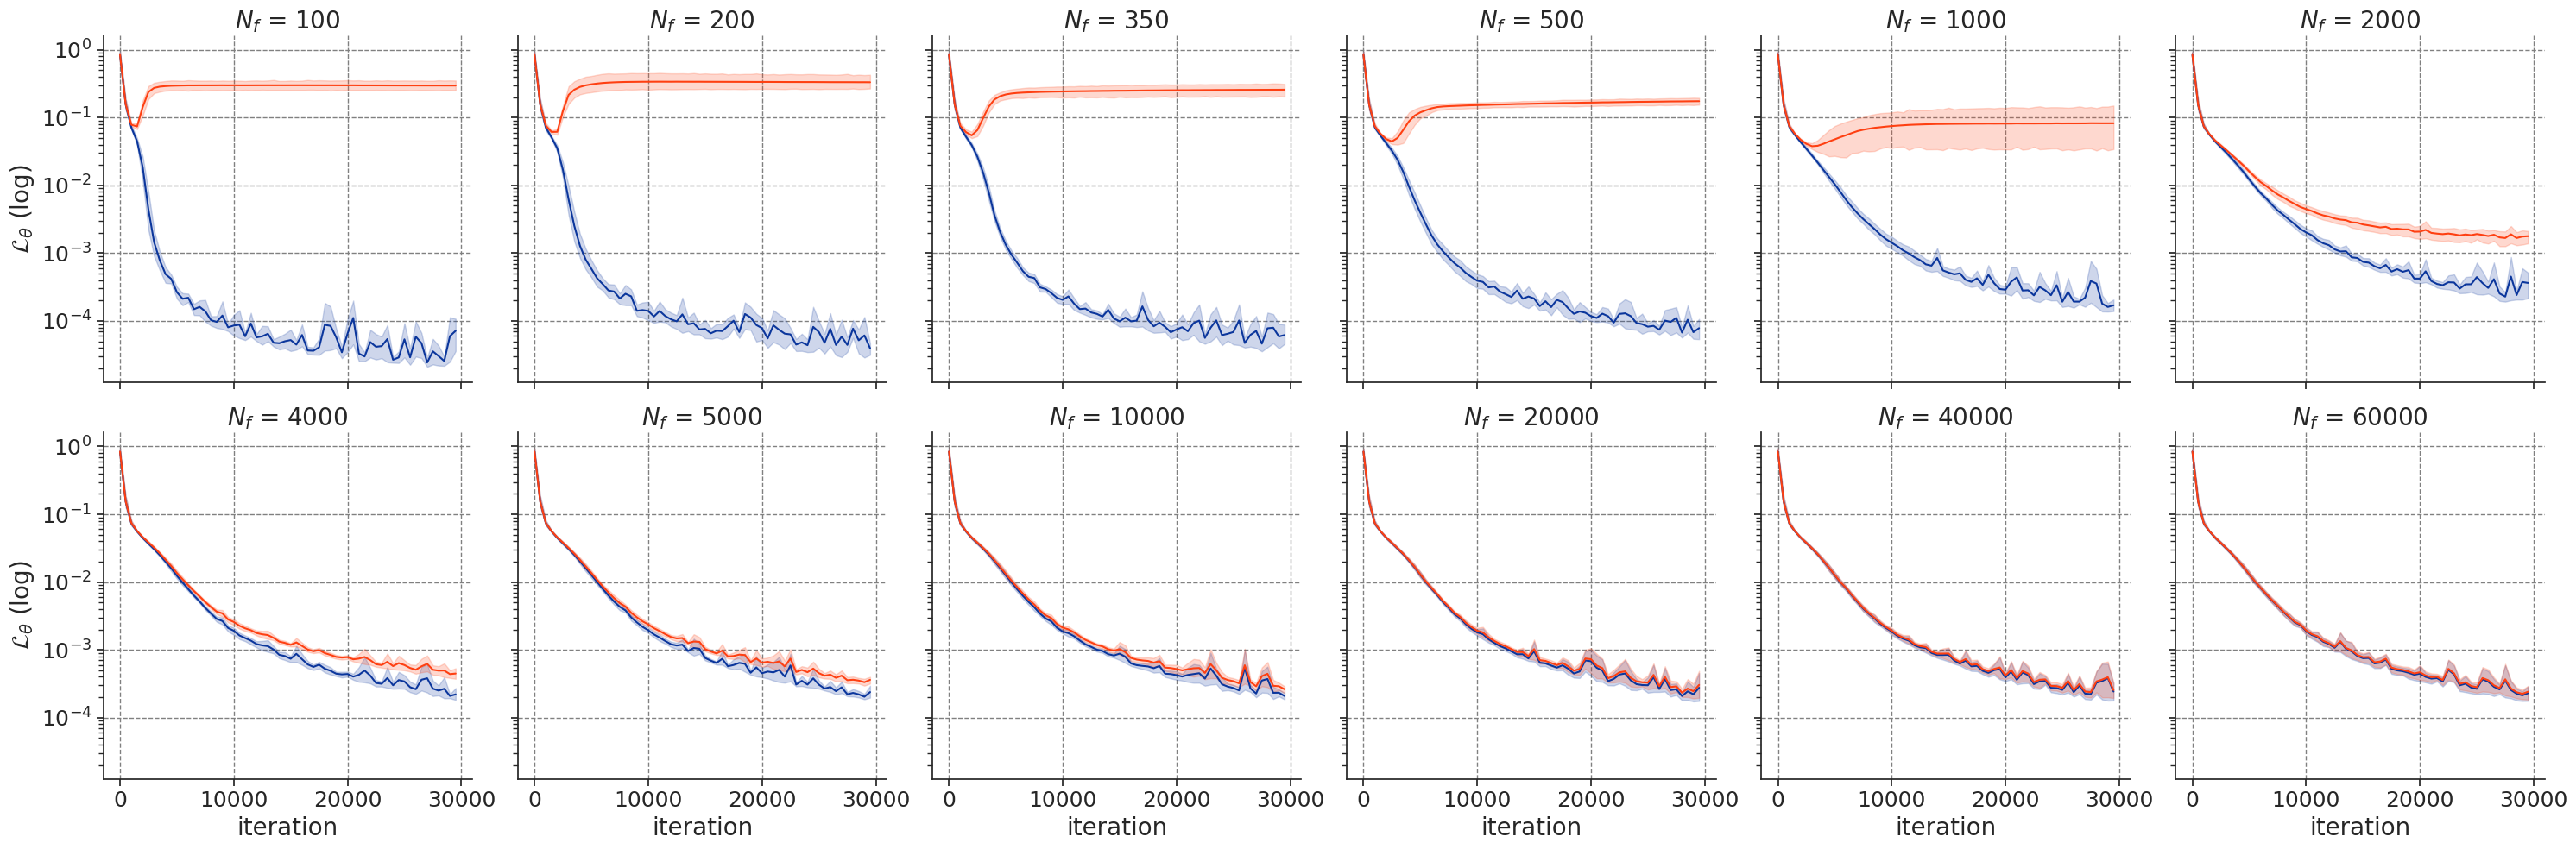

In [7]:
conv = df[["iteration", "N", "train", "test"]]
melt = pd.melt(conv, id_vars=["N", "iteration"], value_vars=["train", "test"])

g = sns.relplot(data=melt, x = 'iteration', y = 'value', hue="variable", kind = 'line', col ='N', legend=False, col_wrap=6,palette = my_palette_train)
g.set(yscale="log")
plt.grid(color='gray', linestyle='dashed')  #just add this

i = 0
for ax in g.axes.flatten():
    ax.grid(color='gray', linestyle='dashed')

    for j in range(2):
        line = ax.get_lines()[j]
        line.set_color(my_palette_train[j])

    ax.set_xlabel('iteration', fontsize=20)
    ax.set_ylabel(r'$\mathcal{L}_\theta$ (log)', fontsize=20)
    title = ax.get_title()
    title = r'$N_f$' + title[1:]
    ax.set_title(title, fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=18)

    i += 1
    
plt.tight_layout()
plt.savefig('plots/lossesSchrodinger.pdf')    

In [8]:
pd.pivot_table(data = df_summary, values = ["diff_min"], index="N")

,diff_min
N,
100,0.016116
200,0.013971
350,0.014222
500,0.012520
1000,0.011825
2000,0.001411
4000,0.000226
5000,0.000128
10000,0.000055


In [9]:
melt_summary

NameError: name 'melt_summary' is not defined

In [ ]:
df_summary['err'] = df_summary['err_u'] + df_summary['err_v'] + df_summary['err_h']
conv_summary = df_summary[["N", "train", "test", "err_u"]]
melt_summary = pd.melt(conv_summary, id_vars=["N"], value_vars=["train", "test", "err"])
g = sns.lineplot(data=melt_summary, x="N", y="value", hue="variable")
g.set(xscale="log")
g.set(yscale="log")